There are some scenarios where we have data elements, but some pairs of elements might have some kind of relation. Such datasets are known as graphs.

A graph consists of vertices (the data elements), where some pairs of vertices have an edge (some connection between elements).

Runtime is always expressed a function of input size. But for graphs, there are two notions of input size: number of vertices $|V|$ and the number of edges $|E|$.

So for example, the runtime can be something $\Theta (|V| + |E|)$, $\Theta (|E||V|^2)$, $\Theta (|V|\log |E|)$, $\Theta (|V|^3)$

Some classifications of graphs:

*  Directed vs Undirected: In a undirected graph, an edge from vertex $u$ to vertex $v$ is also an edge from $v$ to $u$, i.e., $\{u, v\} = \{v, u\}$. In a directed graph, an edge from $u$ to $v$ is not the same as an edge from $v$ to $u$, and it's even possible to have one of them without the other, i.e., $(u, v) \neq (v, u)$

*  Weighted vs Unweighted: In a weighted graph, every edge has an associated value known as a weight. For an unweighted graph, every edge has the same weight.

*  Simple vs Multigraph: In a simple graph, there is at most one edge between any pair of vertices. In a multigraph, there can be multiple edges between the same pair of vertices. We do not cover multigraphs in this course.

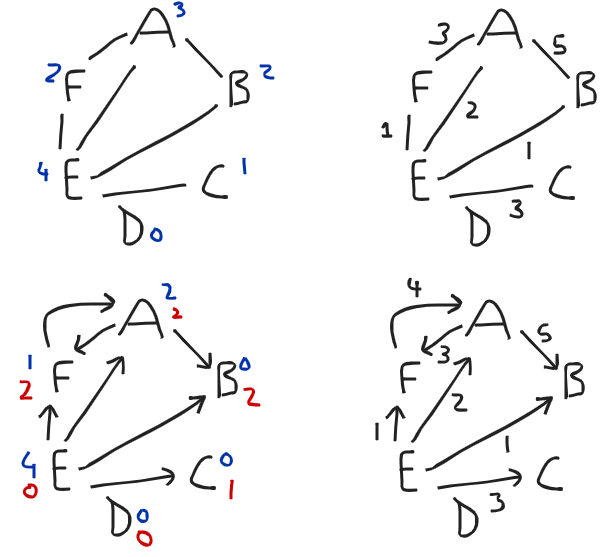

If there is an edge from $u$ to $v$, we say that $v$ is a **neighbor** of $u$, or that $v$ is **adjacent** to $u$, and this edge is **incident** to $u$.

In an undirected graph, the **degree** of a vertex is the number of edges connected to it.

In a directed graph, the **outdegree** of a vertex is the number of outgoing edges from that vertex, while the **indegree** is the number of incoming edges to that vertex. The word "degree" by itself generally refers to outdegree by default.

In an undirected graph, the sum of all vertex degrees = 2 x number of edges

In a directed graph, the sum of all outdegrees = sum of all indegrees = number of edges

For all graphs, $|E| \in O(|V|^2)$

Adjacency Matrix

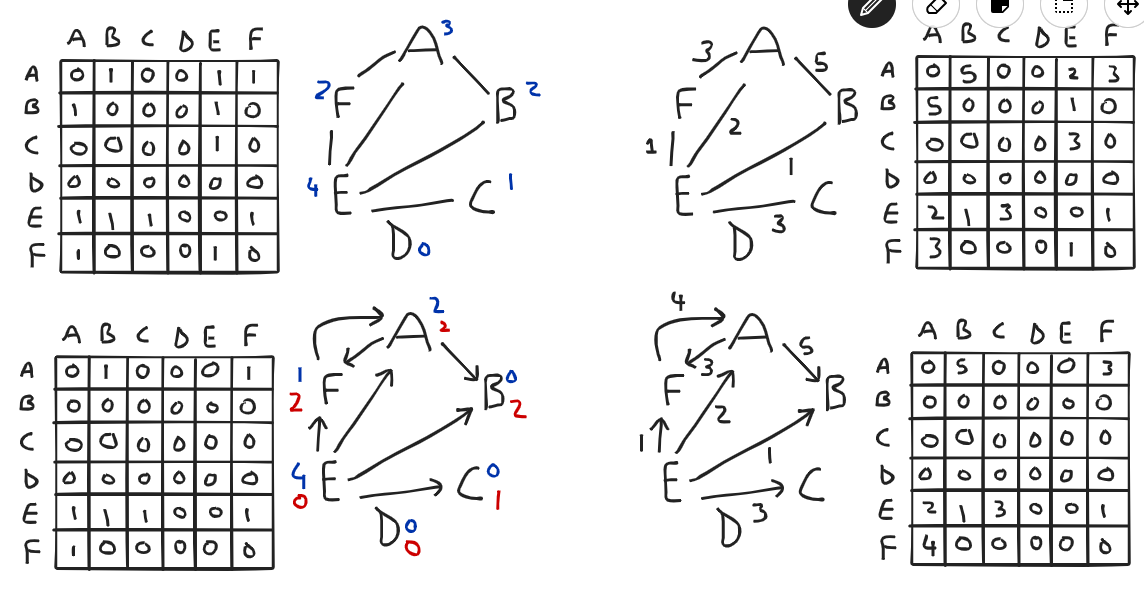

In [ ]:
# Undirected, Unweighted Graph Example

adjmat = [[0, 1, 0, 0, 1, 1],
          [1, 0, 0, 0, 1, 0],
          [0, 0, 0, 0, 1, 0],
          [0, 0, 0, 0, 0, 0],
          [1, 1, 1, 0, 0, 1],
          [1, 0, 0, 0, 1, 0]]

print (adjmat)

for row in adjmat:
  print (*row)

# Directed, Weighted Graph Example

adjmat = [[0, 5, 0, 0, 0, 3],
          [0, 0, 0, 0, 0, 0],
          [0, 0, 0, 0, 0, 0],
          [0, 0, 0, 0, 0, 0],
          [2, 1, 3, 0, 0, 1],
          [4, 0, 0, 0, 0, 0]]

[[0, 1, 0, 0, 1, 1], [1, 0, 0, 0, 1, 0], [0, 0, 0, 0, 1, 0], [0, 0, 0, 0, 0, 0], [1, 1, 1, 0, 0, 1], [1, 0, 0, 0, 1, 0]]
0 1 0 0 1 1
1 0 0 0 1 0
0 0 0 0 1 0
0 0 0 0 0 0
1 1 1 0 0 1
1 0 0 0 1 0


Runtime Analysis of Simple Operations in an Adjacency Matrix:

*  Add an edge: $\Theta (1)$, 2D array indexing and updating
*  Delete an edge (which exists): $\Theta (1)$, 2D array indexing and updating
*  Check if an edge exists: $\Theta (1)$, 2D array indexing
*  Get the weight of an edge (which exists): $\Theta (1)$, 2D array indexing
*  Calculate degree of a vertex in an undirected graph OR outdegree in a directed graph: $\Theta (|V|)$ to count the number of non-zero entries in a single row
*  Calculate indegree in a directed graph: $\Theta (|V|)$ to count the number of non-zero entries in a single column
*  Calculate the total number of edges: $\Theta (|V|^2)$ to count non-zero entries in the entire matrix

Space Complexity: $\Theta (|V|^2)$

Adjacency List

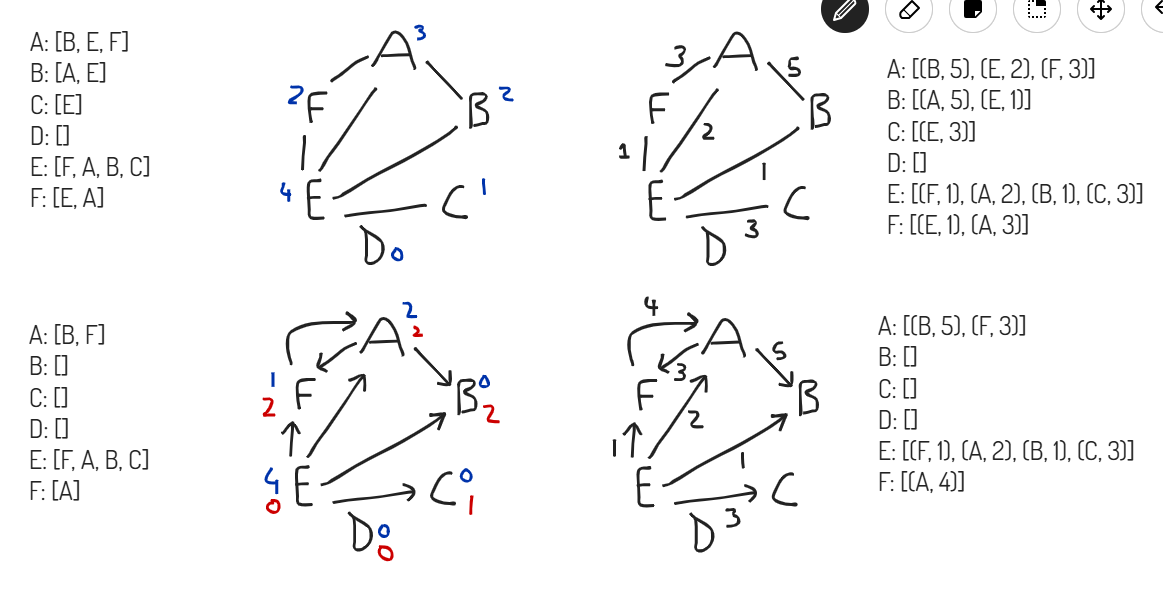

In [ ]:
# It is usually convenient if the vertices were mapped to
# indices from 0 to |V| - 1

# One way to achieve is by simply declaring variables
# for the vertex names

A, B, C, D, E, F = 0, 1, 2, 3, 4, 5

# Undirected, Unweighted Graph Example

adjlst = [[B, E, F],      # A
          [A, E],         # B
          [E],            # C
          [],             # D
          [F, A, B, C],   # E
          [E, A]]         # F

for row in adjlst:
  print (row)

# Directed, Weighted Graph Example

adjlst = [[(B, 5), (F, 3)],                   # A
          [],                                 # B
          [],                                 # C
          [],                                 # D
          [(F, 1), (A, 2), (B, 1), (C, 3)],   # E
          [(A, 4)]]                           # F

for row in adjlst:
  for v, w in row:
    print (f"({chr (ord ('A') + v)}, {w})", end = " ")
  print ()

# Here, we used a 2D array (Python list) for the adjacency
# list. A popular alternative is to use an array of
# linked lists instead. Another alternative is to use
# some kind of dictionary for each row.

[1, 4, 5]
[0, 4]
[4]
[]
[5, 0, 1, 2]
[4, 0]
(B, 5) (F, 3) 



(F, 1) (A, 2) (B, 1) (C, 3) 
(A, 4) 


Runtime Analysis of Simple Operations in an Adjacency List:

*  Add an edge: $\Theta (1)$, array append
*  Delete an edge (which exists): Worst-Case $\Theta (d)$, where $d$ is the degree of the vertex whose row we are modifying, but this can be as high as $\Theta (|V|)$
*  Check if an edge exists: $\Theta (d)$, same
*  Get the weight of an edge (which exists): $\Theta (d)$, same
*  Calculate degree of a vertex in an undirected graph OR outdegree in a directed graph: $\Theta (1)$ to determine the length of a row (this takes constant-time for most dynamic array implementations)
*  Calculate indegree in a directed graph: $\Theta (|V| + |E|)$ in the worst-case, as we may have to go through the entire adjacency list. This is usually impractical, and applications that require computing indegree frequently usually store a second graph with the edges reversed.
*  Calculate the total number of edges: $\Theta (|V|)$ to get the lengths of all rows

Space Complexity: $\Theta (|V| + |E|)$

**Problem:** Given two vertices $u$ and $v$, does there exist a path from $u$ to $v$?

**Problem:** Given a vertex $u$, find all vertices that are reachable from $u$.

Both of these problems can be solved through a graph **traversal**. There are two popular traversal algorithms:

*  Depth-First Search (DFS)
*  Breadth-First Search (BFS)

Informally, for DFS, we begin at the starting vertex and then repeat the following:

*  Mark the current vertex
*  Take an edge to an unmarked vertex (the order is actually based on the adjacency matrix/list order)
*  If there are no unmarked neighbors, then we are done with the current vertex, and we take one step back.

DFS ends when we are done with the starting vertex.

In [ ]:
# [OPTIONAL] convert index to uppercase letter
def idx2char (idx):
  return chr (ord ('A') + idx)

In [2]:
numVertices = 14

A, B, C, D, E, F, G, H, I, J, K, L, M, N = range (14) # A = 0, B = 1, C = 2, ...

adjlst = [[B, J],           # A
          [M, A, C, K, L],  # B
          [G, B],           # C
          [N, F],           # D
          [G],              # E
          [D, I],           # F
          [H, C, L, E],     # G
          [G],              # H
          [F],              # I
          [A, L],           # J
          [L, B],           # K
          [J, K, M, B, G],  # L
          [L, B],           # M
          [D]]              # N

# False means unmarked, True means marked
visited = [False] * numVertices

# optional: to build the DFS tree, we can simply keep track of the
# parent for each vertex
parent = [False] * numVertices

def dfs (adjlst, curr):
  visited[curr] = True    # mark current vertex
  for nbr in adjlst[curr]:    # iterate through every neighbor of curr
    if not visited[nbr]:      # for unmarked neighbors
      parent[nbr] = curr      # [optional] update parent of neighbor to curr
      dfs (adjlst, nbr)       # recursively run DFS on the neighbor

dfs (adjlst, G)
print (visited)
print (parent)
for i in range (len (parent)):
  if parent[i] == False:
    print (f"No parent for {idx2char (i)}")
  else:
    print (f"Parent of {idx2char (i)} is {idx2char (parent[i])}")

[True, True, True, False, True, False, True, True, False, True, True, True, True, False]
[9, 2, 6, False, 6, False, False, 6, False, 11, 11, 12, 1, False]


NameError: name 'idx2char' is not defined

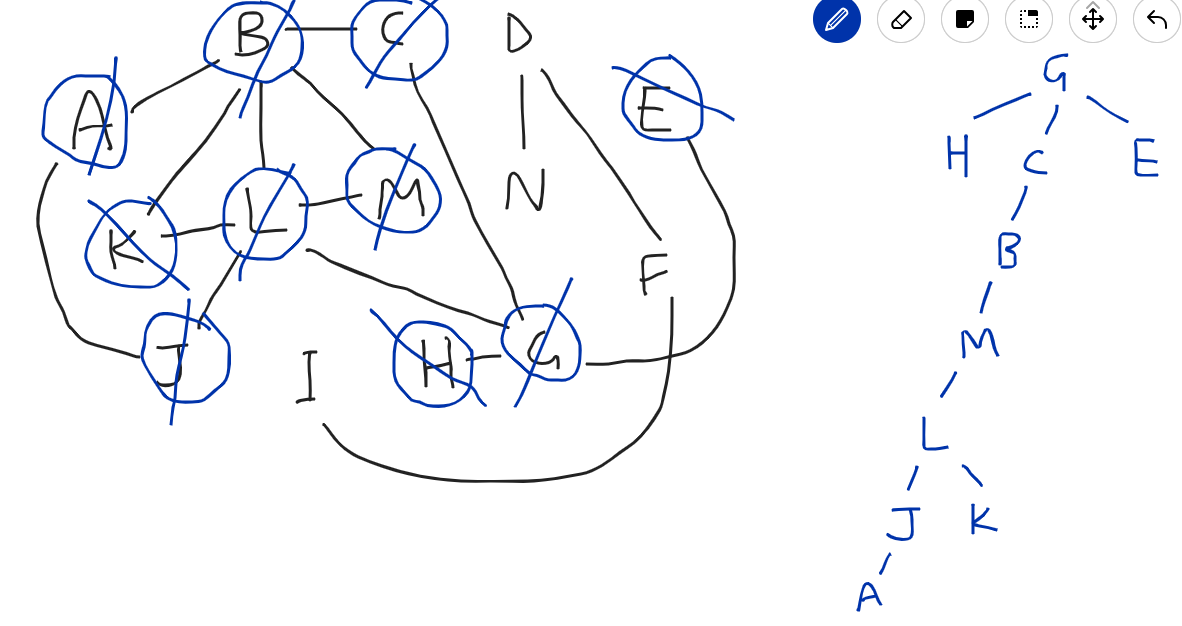

Runtime Analysis:

For an adjacency list in the worst-case, the runtime is $\Theta (|V| + |E|)$ because:
*  initializing the visited array takes $\Theta (|V|)$ time
*  in the worst-case, we may have to visit all $|V|$ vertices, but we will never visit the same vertex more than once
*  for each vertex we visit, we check ALL its neighbors. In the worst-case, we may end up checking all of the edges of the graph, which takes $\Theta (|E|)$.

In the best-case, we may not find any edges from the starting vertex, but we still need to initialize visited, which takes $\Theta (|V|)$ time.

For adjacency matrix, the worst-case is $\Theta (|V|^2)$ because checking all neighbors of a vertex requires going through the entire row of $|V|$ entries. Best-Case is still $\Theta (|V|)$.